# Linear Regression and Cross Validation

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [49]:
'''
    generate artificial data
'''

N = 21  # number of samples
true_slope = 1 # a to be found out
X = np.linspace(-10, 10, N) # N equally spaced numbers between -10 and 10
noise_std = 3 # noise ranges from 0 to noise_std
noise = np.random.normal(0, noise_std, size=N) # noise is extracted from a gaussian
y = true_slope * X + noise # calculating points for each x value

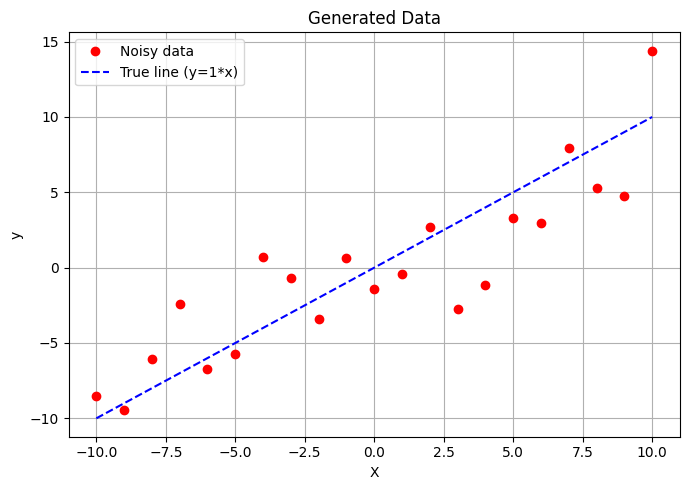

In [50]:
''' 
    visualize the generated data
'''

plt.figure(figsize=(7, 5))
plt.plot(X, y, 'ro', label='Noisy data')
plt.plot(X, true_slope * X, 'b--', label='True line (y=1*x)')
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("data.pdf")
plt.show()



In [51]:
'''
    preparing linear models and LOOCV (Leave One Out Cross Validation)
'''

loo = LeaveOneOut() # abstracts LOOCV logic
reg_with_intercept = LinearRegression(fit_intercept=True) # y = a * x + b
reg_no_intercept = LinearRegression(fit_intercept=False) # y = a * x

errors_with_intercept = []
errors_no_intercept = []

In [52]:
'''
    performing LOOCV
'''

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index].reshape(-1, 1), X[test_index].reshape(-1, 1)
    y_train, y_test = y[train_index], y[test_index]

    # fit both models
    reg_with_intercept.fit(X_train, y_train)
    reg_no_intercept.fit(X_train, y_train)

    # predict on test point
    y_pred_intercept = reg_with_intercept.predict(X_test)
    y_pred_no_intercept = reg_no_intercept.predict(X_test)

    # compute squared errors
    errors_with_intercept.append(mean_squared_error(y_test, y_pred_intercept))
    errors_no_intercept.append(mean_squared_error(y_test, y_pred_no_intercept))

In [53]:
'''
    calculating mean error for each model
'''

mean_error_with_intercept = np.mean(errors_with_intercept)
mean_error_no_intercept = np.mean(errors_no_intercept)

print("Leave-One-Out Cross-Validation Results:")
print(f"Mean Squared Error (y = ax + b): {mean_error_with_intercept:.4f}")
print(f"Mean Squared Error (y = ax):     {mean_error_no_intercept:.4f}")

Leave-One-Out Cross-Validation Results:
Mean Squared Error (y = ax + b): 9.1747
Mean Squared Error (y = ax):     8.3103


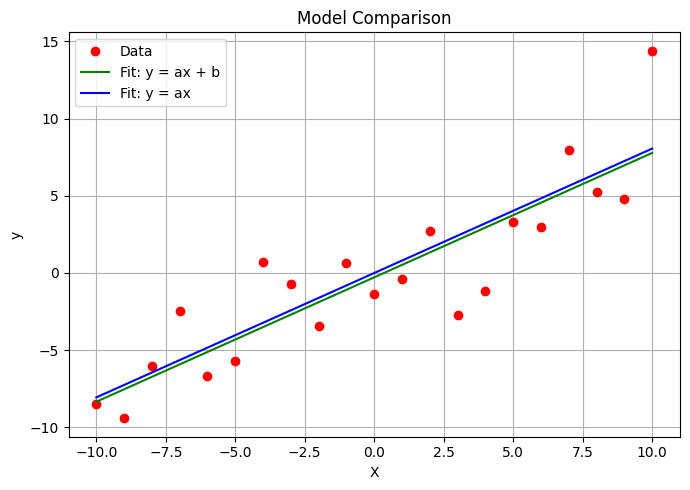

In [ ]:
'''
    showing how the models are fitting the data if "trained" on all points
'''

reg_with_intercept.fit(X.reshape(-1, 1), y)
reg_no_intercept.fit(X.reshape(-1, 1), y)

plt.figure(figsize=(7, 5))
plt.plot(X, y, 'ro', label='Data')
plt.plot(X, reg_with_intercept.predict(X.reshape(-1, 1)), 'g-', label='Fit: y = ax + b')
plt.plot(X, reg_no_intercept.predict(X.reshape(-1, 1)), 'b-', label='Fit: y = ax')
plt.title("Model Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('models_fitting_data.pdf')
plt.show()